In [186]:
%pip install pandas numpy tensorflow scikit-learn matplotlib seaborn joblib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Data Understanding (Exploratory Analysis)

In [187]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Embedding, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

df = pd.read_csv("modifiedDataset_WithDIM.csv")
df.head()


,Data_Dimensions,No_of_Attributes,No_of_Records,Primary_Variable (Data Type),Task (Purpose),Target Audience,Chart_Type
0,1D,1,20,continuous,distribution,0,1
1,ND,20,200,categorical,relationship,1,5
2,1D,1,40,ordinal,trends,0,8
3,1D,1,5,continuous,distribution,0,1
4,1D,1,6,continuous,distribution,0,1


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Data_Dimensions               400 non-null    object
 1   No_of_Attributes              400 non-null    int64 
 2   No_of_Records                 400 non-null    int64 
 3   Primary_Variable (Data Type)  400 non-null    object
 4   Task (Purpose)                400 non-null    object
 5   Target Audience               400 non-null    int64 
 6   Chart_Type                    400 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 22.0+ KB


In [189]:

df.describe()

,No_of_Attributes,No_of_Records,Target Audience,Chart_Type
count,400.000000,400.000000,400.000000,400.000000
mean,7.295000,498.462500,0.477500,3.572500
std,14.838579,976.033859,0.500119,2.194718
min,1.000000,3.000000,0.000000,1.000000
25%,1.000000,15.000000,0.000000,1.000000
50%,2.000000,100.000000,0.000000,4.000000
75%,5.000000,500.000000,1.000000,5.000000
max,100.000000,5000.000000,1.000000,8.000000


In [190]:
features_summary = pd.DataFrame({
    "Feature Name": df.columns,
    "Data Type": df.dtypes
})
print(features_summary)


                                              Feature Name Data Type
Data_Dimensions                            Data_Dimensions    object
No_of_Attributes                          No_of_Attributes     int64
No_of_Records                                No_of_Records     int64
Primary_Variable (Data Type)  Primary_Variable (Data Type)    object
Task (Purpose)                              Task (Purpose)    object
Target Audience                            Target Audience     int64
Chart_Type                                      Chart_Type     int64


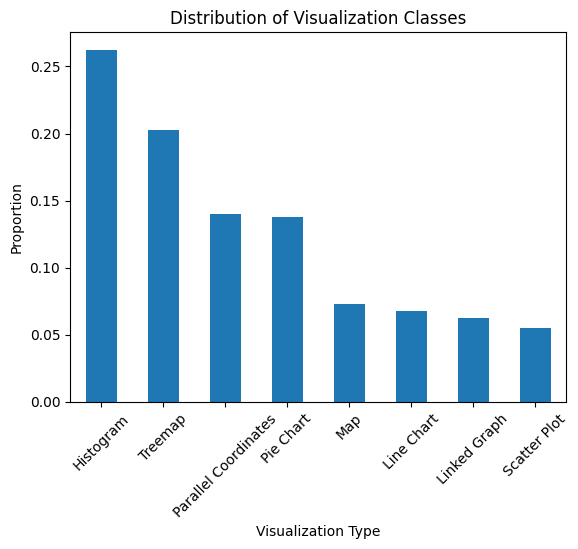

In [191]:
visualization_classes = {
    1: "Histogram",
    2: "Pie Chart",
    3: "Map",
    4: "Treemap",
    5: "Parallel Coordinates",
    6: "Scatter Plot",
    7: "Linked Graph",
    8: "Line Chart"
}
df["Chart_Type"] = df["Chart_Type"].map(visualization_classes)
df["Chart_Type"].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribution of Visualization Classes")
plt.ylabel("Proportion")
plt.xlabel("Visualization Type")
plt.xticks(rotation=45)
plt.show()

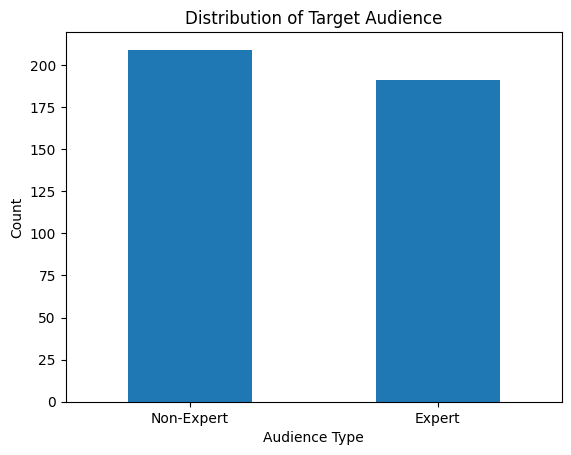

In [192]:
expertise_mapping = {
    0: "Non-Expert",
    1: "Expert"
}

df["Target Audience"] = df["Target Audience"].map(expertise_mapping)
df["Target Audience"].value_counts().plot(kind='bar')
plt.title("Distribution of Target Audience")
plt.ylabel("Count")
plt.xlabel("Audience Type")
plt.xticks(rotation=0)
plt.show()

In [193]:
# Check for missing values
print(df.isnull().sum())

Data_Dimensions                 0
No_of_Attributes                0
No_of_Records                   0
Primary_Variable (Data Type)    0
Task (Purpose)                  0
Target Audience                 0
Chart_Type                      0
dtype: int64


In [194]:

numerical_cols = ["No_of_Attributes", "No_of_Records"]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df = pd.get_dummies(df, columns=['Data_Dimensions','Primary_Variable (Data Type)', 'Task (Purpose)', 'Target Audience'], drop_first=True, dtype=int)

encoded_target = pd.get_dummies(df["Chart_Type"], dtype=int)
df = df.drop(columns=["Chart_Type"])
X = df
Y = encoded_target

print("Mean values:", scaler.mean_)
print("Standard deviation values:", scaler.scale_)

Mean values: [  7.295  498.4625]
Standard deviation values: [ 14.8200194  974.81305315]


In [195]:
df

,No_of_Attributes,No_of_Records,Data_Dimensions_2D,Data_Dimensions_Hierarchical,Data_Dimensions_ND,Primary_Variable (Data Type)_continuous,Primary_Variable (Data Type)_geographical,Primary_Variable (Data Type)_ordinal,Task (Purpose)_distribution,Task (Purpose)_relationship,Task (Purpose)_trends,Target Audience_Non-Expert
0,-0.424763,-0.490825,0,0,0,1,0,0,1,0,0,1
1,0.857286,-0.306174,0,0,1,0,0,0,0,1,0,0
2,-0.424763,-0.470308,0,0,0,0,0,1,0,0,1,1
3,-0.424763,-0.506212,0,0,0,1,0,0,1,0,0,1
4,-0.424763,-0.505187,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,2.881575,-0.203590,0,0,1,1,0,0,0,1,0,0
396,0.857286,2.053253,0,1,0,0,0,1,0,0,0,0
397,-0.424763,-0.475437,0,0,0,0,0,1,1,0,0,1
398,-0.424763,-0.465179,0,0,0,1,0,0,1,0,0,1


In [196]:
preprocessing_pipeline = {
    "scaler": scaler,
    "feature_columns": X.columns.tolist(),
    "one_hot_columns": list(X.columns)  # Save structure for one-hot encoding
}
pipeline_path = "/workspaces/codespaces-models/visiobot-project/visiobot-backend/saved_models/preprocessing_pipeline.pkl"
joblib.dump(preprocessing_pipeline, pipeline_path)
print(f"Preprocessing pipeline saved successfully at {pipeline_path}")

Preprocessing pipeline saved successfully at /workspaces/codespaces-models/visiobot-project/visiobot-backend/saved_models/preprocessing_pipeline.pkl


In [197]:
print("Scaler mean at inference:", preprocessing_pipeline['scaler'].mean_)
print("Scaler std at inference:", preprocessing_pipeline['scaler'].scale_)

Scaler mean at inference: [  7.295  498.4625]
Scaler std at inference: [ 14.8200194  974.81305315]


In [198]:
import os
from sklearn.model_selection import StratifiedKFold

# --- assume X (DataFrame) and Y (one-hot DataFrame) are already loaded here ---

# Convert one-hot to label indices for stratification
y_labels = np.argmax(Y.values, axis=1)

# Prepare StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Containers
accuracies = []
r2_scores   = []
n_classes   = Y.shape[1]
conf_matrix = np.zeros((n_classes, n_classes), dtype=int)
hits_at_2_all = []
hits_at_3_all = []

def compute_hits_at_k(y_true, y_pred_probs, k):
    hits = 0
    for true_label, probs in zip(y_true, y_pred_probs):
        top_k_preds = np.argsort(probs)[-k:][::-1]
        if true_label in top_k_preds:
            hits += 1
    return hits / len(y_true)
# 10-fold stratified cross-validation
for fold, (train_idx, test_idx) in enumerate(skf.split(X, y_labels), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]

    # Build model
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(12, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.005),
        metrics=['accuracy', 'mse']
    )

    # Early stopping
    es = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train
    history= model.fit(
        X_train, Y_train,
        epochs=500,
        batch_size=10,
        verbose=1,
        validation_data=(X_test, Y_test),
        callbacks=[es]
    )

    # Evaluate
    loss, acc, mse = model.evaluate(X_test, Y_test, verbose=0)
    accuracies.append(acc)

    # Predictions → confusion matrix
    y_pred         = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(Y_test.values, axis=1)

    cm = confusion_matrix(
        y_true_classes,
        y_pred_classes,
        labels=range(n_classes)
    )
    conf_matrix += cm

    # R² on the class indices
    r2_scores.append(r2_score(y_true_classes, y_pred_classes))
     # Hits@2 and Hits@3
    hit2 = compute_hits_at_k(y_true_classes, y_pred, k=2)
    hit3 = compute_hits_at_k(y_true_classes, y_pred, k=3)
    hits_at_2_all.append(hit2)
    hits_at_3_all.append(hit3)
    print(f"Fold {fold} — acc: {acc:.3f}, R²: {r2_scores[-1]:.3f}, Hits@2: {hit2:.3f}, Hits@3: {hit3:.3f}")

# Save final model (from last fold)
save_dir = "/workspaces/codespaces-models/visiobot-project/visiobot-backend/saved_models"
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, "visiobot_model.keras")
model.save(model_path)
print("Model saved successfully at", model_path)

# Summary
final_accuracy = np.mean(accuracies) * 100
final_r2       = np.mean(r2_scores)
final_hits2 = np.mean(hits_at_2_all)
final_hits3 = np.mean(hits_at_3_all)
print(f"\nFinal Mean Accuracy: {final_accuracy:.2f}%")
print(f"Final Mean R² Score: {final_r2:.4f}")

print(f"Final Mean Hits@2: {final_hits2:.4f}")


Epoch 1/500
 1/36 ━━━━━━━━━━━━━━━━━━━━ 31s 897ms/step - accuracy: 0.0000e+00 - loss: 2.0192 - mse: 0.1085

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2176 - loss: 1.9814 - mse: 0.1062 - val_accuracy: 0.4250 - val_loss: 1.5611 - val_mse: 0.0881
Epoch 2/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4291 - loss: 1.4856 - mse: 0.0845 - val_accuracy: 0.5750 - val_loss: 1.0696 - val_mse: 0.0626
Epoch 3/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5959 - loss: 1.0570 - mse: 0.0619 - val_accuracy: 0.8500 - val_loss: 0.6701 - val_mse: 0.0392
Epoch 4/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7823 - loss: 0.7063 - mse: 0.0419 - val_accuracy: 0.9750 - val_loss: 0.4074 - val_mse: 0.0223
Epoch 5/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.4994 - mse: 0.0298 - val_accuracy: 0.9750 - val_loss: 0.2959 - val_mse: 0.0148
Epoch 6/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8721 - loss: 0.4601 - mse: 0.0280 - val_accuracy: 0.9500 - val_loss: 0.2520 - val_mse: 0.0128
Epoch 7/500
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

In [199]:
model.summary()

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_267 (Dense)               │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_268 (Dense)               │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_269 (Dense)               │ (None, 8)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,550 (6.06 KB)

 Trainable params: 516 (2.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,034 (4.04 KB)

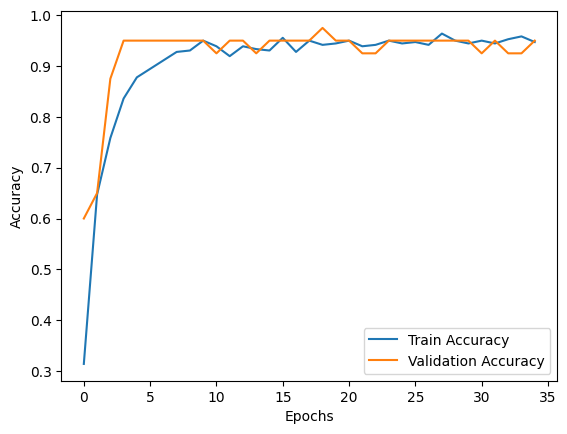

In [200]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

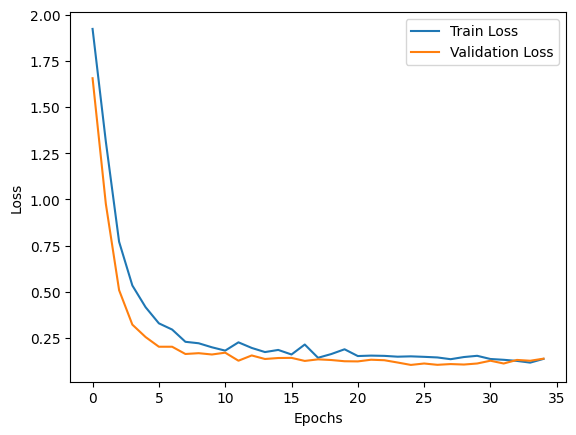

In [201]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

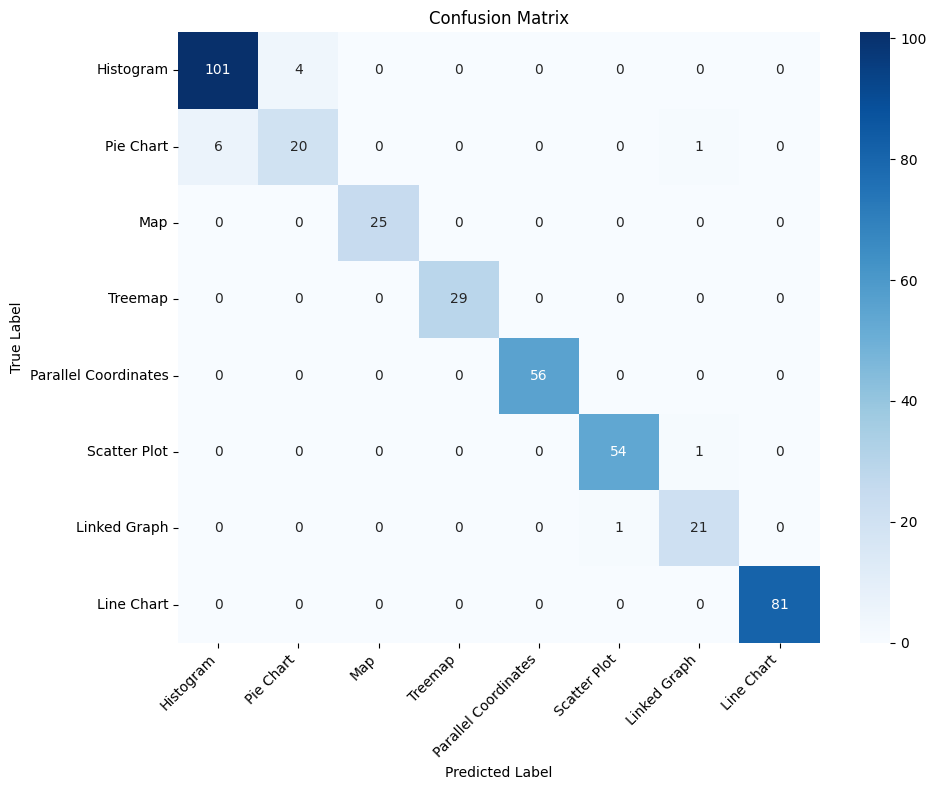

In [202]:
plt.figure(figsize=(10, 8))
class_names = list(visualization_classes.values())
sns.heatmap(conf_matrix.astype(int), 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [203]:
report = classification_report(y_true_classes, y_pred_classes, target_names=list(visualization_classes.values()), labels=range(8))
print("Classification Report:\n", report)

Classification Report:
                       precision    recall  f1-score   support

           Histogram       0.90      0.90      0.90        10
           Pie Chart       0.50      0.50      0.50         2
                 Map       1.00      1.00      1.00         3
             Treemap       1.00      1.00      1.00         3
Parallel Coordinates       1.00      1.00      1.00         6
        Scatter Plot       1.00      1.00      1.00         5
        Linked Graph       1.00      1.00      1.00         3
          Line Chart       1.00      1.00      1.00         8

            accuracy                           0.95        40
           macro avg       0.93      0.93      0.93        40
        weighted avg       0.95      0.95      0.95        40



In [204]:
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

TPR = np.sum(TP) / (np.sum(TP) + np.sum(FN))  # Sensitivity / Recall
TNR = np.sum(TN) / (np.sum(TN) + np.sum(FP))  # Specificity
FPR = np.sum(FP) / (np.sum(FP) + np.sum(TN))  # False Positive Rate
FNR = np.sum(FN) / (np.sum(FN) + np.sum(TP))  # False Negative Rate
Precision = np.sum(TP) / (np.sum(TP) + np.sum(FP))  # Precision Calculation
F1 = 2 * (Precision * TPR) / (Precision + TPR)  # F1 Score Calculation

print(f"True Positive Rate (TPR / Sensitivity): {TPR:.4f}")
print(f"True Negative Rate (TNR / Specificity): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"F1 Score: {F1:.4f}")

True Positive Rate (TPR / Sensitivity): 0.9675
True Negative Rate (TNR / Specificity): 0.9954
False Positive Rate (FPR): 0.0046
False Negative Rate (FNR): 0.0325
Precision: 0.9675
F1 Score: 0.9675


In [205]:
try:
    from ucimlrepo import fetch_ucirepo  
except ImportError:
    import os
    os.system("pip install ucimlrepo")
    from ucimlrepo import fetch_ucirepo  

import pandas as pd
abalone = fetch_ucirepo(id=1)  
X = abalone.data.features  
y = abalone.data.targets  
dataset = pd.concat([X, y], axis=1)
csv_filename = "abalone_dataset.csv"
dataset.to_csv(csv_filename, index=False)
print(f"Dataset downloaded and saved as {csv_filename}")

Dataset downloaded and saved as abalone_dataset.csv


In [206]:
# Try to import ucimlrepo, install if not available
try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    import os
    os.system("pip install ucimlrepo")
    from ucimlrepo import fetch_ucirepo

import pandas as pd

# ========== Statlog (Image Segmentation) Dataset ==========
statlog_image_segmentation = fetch_ucirepo(id=147)

# Combine features and targets
X_segmentation = statlog_image_segmentation.data.features
y_segmentation = statlog_image_segmentation.data.targets
dataset_segmentation = pd.concat([X_segmentation, y_segmentation], axis=1)

# Save to CSV
segmentation_csv = "statlog_image_segmentation_dataset.csv"
dataset_segmentation.to_csv(segmentation_csv, index=False)
print(f"Statlog Image Segmentation dataset saved as '{segmentation_csv}'")

# Print metadata and variable info
print("\nStatlog Image Segmentation Dataset Metadata:")
print(statlog_image_segmentation.metadata)

print("\nStatlog Image Segmentation Dataset Variables:")
print(statlog_image_segmentation.variables)


Statlog Image Segmentation dataset saved as 'statlog_image_segmentation_dataset.csv'

Statlog Image Segmentation Dataset Metadata:
{'uci_id': 147, 'name': 'Statlog (Image Segmentation)', 'repository_url': 'https://archive.ics.uci.edu/dataset/147/statlog+image+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/147/data.csv', 'abstract': 'This dataset is an image segmentation database similar to a database already present in the repository (Image segmentation database) but in a slightly different form.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2310, 'num_features': 19, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5P01G', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The instances were drawn 

In [207]:

# Check Feature Variance
print("\n🔎 Checking Feature Variance...")
feature_variance = df.var()
print(feature_variance)

# Identify Features with Low Variance
low_variance_features = feature_variance[feature_variance < 0.0001]
print("\n⚠️ Low Variance Features:\n", low_variance_features)


🔎 Checking Feature Variance...
No_of_Attributes                             1.002506
No_of_Records                                1.002506
Data_Dimensions_2D                           0.111523
Data_Dimensions_Hierarchical                 0.167763
Data_Dimensions_ND                           0.131303
Primary_Variable (Data Type)_continuous      0.238496
Primary_Variable (Data Type)_geographical    0.080044
Primary_Variable (Data Type)_ordinal         0.192882
Task (Purpose)_distribution                  0.250000
Task (Purpose)_relationship                  0.129568
Task (Purpose)_trends                        0.118891
Target Audience_Non-Expert                   0.250119
dtype: float64

⚠️ Low Variance Features:
 Series([], dtype: float64)


In [208]:
features = pd.DataFrame({
    'Feature Name': X.columns,
    'Type': ['Numerical' if col in ['No_of_Attributes', 'No_of_Records'] else 'Categorical' for col in X.columns]
})
print(features)


     Feature Name         Type
0             Sex  Categorical
1          Length  Categorical
2        Diameter  Categorical
3          Height  Categorical
4    Whole_weight  Categorical
5  Shucked_weight  Categorical
6  Viscera_weight  Categorical
7    Shell_weight  Categorical
